# UW Data 558 Polished Code Release - Daniel White
## Elements of Statistical Learning - Spam Dataset

### Introduction
This Jupyter notebook demonstrates the use of my own gradient descent algorithm to fit a Logistic Regression model. In this notebook, I demonstrate my own Logistic Regression algorithm and assess its performance during the training process on a real world dataset. 

The real world dataset used in this notebook comes from the Elements of Statistical Learning textbook. The Spam dataset contains the features of a collection of personal and work emails mixed with marketing emails that should be marked as "Spam". The dataset contains an indicator variable on whether the email should be marked as spam. More information on the dataset can be found at the link below.

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.info.txt


In [2]:
#Change ipython notebook output settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import packages required packages
import src.LogisticRegression as mlr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV


### Data Preparation

In the code block below, the dataset is loaded into memory, divided into the predictor (X) and response (Y) sets. The predictor and response sets are then divided into training and test sets. The training set will used to fit the model while the test set will be used to test its performance in correctly classifying emails as spam. The data in the both predictor sets are centered and standardized on the same scale.

In [3]:
# Load the Spam dataset, drop NA
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data', delim_whitespace=True, header =None)
spam = data.dropna()

#Replace 0s with -1 in final column
spam[57].replace(0,-1,inplace=True)

#Split into training and test set and standardize data using the sklearn functions

# Create training and test sets for X and Y variables
X = spam.drop(57, axis=1)
y = spam.iloc[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Standardize the data using SKlearn processing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Append a column of 1's to X_train and X_test to represent the model intercept coefficient
X_train = preprocessing.add_dummy_feature(X_train) 
X_test = preprocessing.add_dummy_feature(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Logistic Regression Model Training

Using the my_logistic_regression function, the model is trained based on the features in the predictor training set and the classification of the response set. The Logistic Regression objective function can be summarized as:

$$\min_{\beta \in \mathbb{R}^d} \: -\frac{1}{n} \sum_{i=1}^n \left(y_i\beta^Tx_i+ \log(1+\exp(x_i^T \beta))\right).$$

The model is first initialized with a random set of coefficients and this objective function is minimized iteratively. The chart below shows the value of the objective value for Logistic Regression through each iteration of the model. The objective value decreases with every iteration until the stopping criteria for the model is reached.

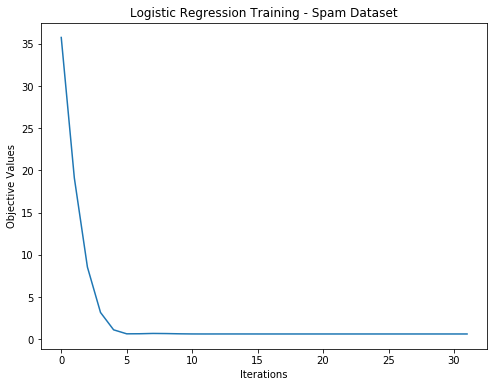

In [4]:
#Set model settings
np.random.seed(9)
n,d = X_train.shape
eps = 0.001
max_iter = 1000
lamb = 1
t_init = mlr.compute_t(X_train, lamb=lamb)
beta_in = np.random.normal(size=d)

#Fit model with my own logistic regression algorithm
mlr_training = mlr.my_logistic_regression(beta_in, X=X_train, Y=y_train, t_init = t_init, eps= eps, max_iter = max_iter, lamb=lamb)

#Plot minimization of objective value
mlr.plot_training_obj(mlr_training,
                     X=X_train, 
                     Y=y_train, 
                     lamb=lamb, 
                     plot_title = "Logistic Regression Training - Spam Dataset")

### Logistic Regression Model Performance

The performance of the model through each iteration of the training process is depicted in the chart below. At the first iteration, the model has roughly a 50% misclassification rate. The misclassification rate decreases with every iteration as the objective value of the Logistic Regression equation is minimized. For the model depicted below, the regularization parameter (lambda) was set equal to 1. Under this default setting, the misclassificaiton for the training and test set was comparable throughout the training process.

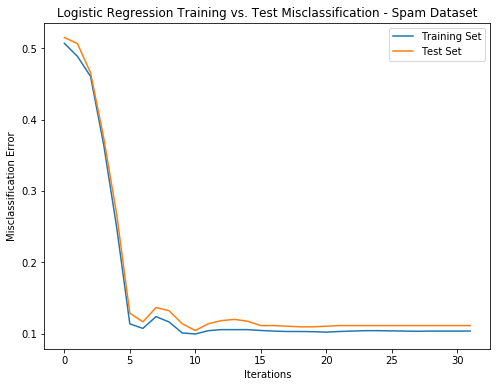

In [5]:
mlr.plot_training_misclass(mlr_training, 
                          X_train=X_train, 
                          y_train=y_train, 
                          X_test=X_test, 
                          y_test=y_test, 
                          lamb=lamb, 
                          plot_title = "Logistic Regression Training vs. Test Misclassification - Spam Dataset")

The final model used for classification is the final iteration from the model training process. Using this model, the misclassification errors for the training and test sets are computed and presented in the code block below. Overall, the misclassification rates for both sets are approximately 10-11%.

In [6]:
train_misclass = mlr.class_error(X_train.dot(mlr_training[-1]), y_train)
print("The misclassification error on the training set is", train_misclass)
test_misclass = mlr.class_error(X_test.dot(mlr_training[-1]), y_test)
print("The misclassification error on the test set is", test_misclass)

The misclassification error on the training set is 0.10347826087
The misclassification error on the test set is 0.111207645526


### Logistic Regression Model Performance - Cross-validation

Next, the ideal value for the regularization parameter lambda is computed using the cross-validation function for Logistic Regression from sklearn. The best parameter is transformed to match the objective function used in my own implementation and printed below.

In [7]:
logregCV = LogisticRegressionCV()
logregCV_fit = logregCV.fit(X_train, y_train)
best_C = logregCV_fit.C_
n,d = X_train.shape
CV_lamb = 1/(2*n*best_C)
print("According to CV, the optimal lambda parameter is", float(CV_lamb))

According to CV, the optimal lambda parameter is 6.72694033856925e-06


In the code block below, the Logistic Regression model is refitted using the regularization parameter computed using cross-validation. As the chart shows, the misclassification error rate is slightly lower on the training set than the test set.

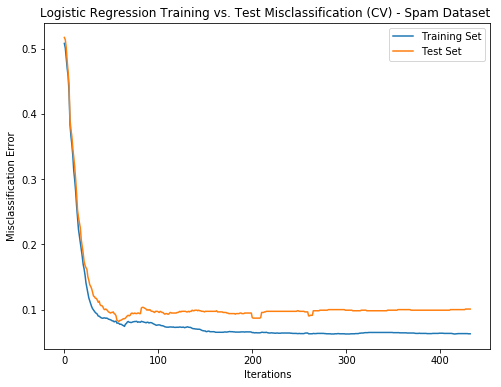

In [9]:
np.random.seed(9)
n,d = X_train.shape
eps = 0.001
max_iter = 1000
lamb = CV_lamb
t_init = mlr.compute_t(X_train, lamb=lamb)
beta_in = np.random.normal(size=d)
mlr_training = mlr.my_logistic_regression(beta_in, X=X_train, Y=y_train, t_init = t_init, eps= eps, max_iter = max_iter, lamb=lamb)
mlr.plot_training_misclass(mlr_training, 
                          X_train=X_train, 
                          y_train=y_train, 
                          X_test=X_test, 
                          y_test=y_test, 
                          lamb=lamb, 
                          plot_title = "Logistic Regression Training vs. Test Misclassification (CV) - Spam Dataset ")

The misclassification error rate on the training and test set in the final model are presented below. Overall, the regularization parameter computed by sklearn improved the accuracy of the model with a lower misclassication rate on both the training and test sets.

In [10]:
train_misclass = mlr.class_error(X_train.dot(mlr_training[-1]), y_train)
print("The misclassification error on the training set is", train_misclass)
test_misclass = mlr.class_error(X_test.dot(mlr_training[-1]), y_test)
print("The misclassification error on the test set is", test_misclass)

The misclassification error on the training set is 0.0628985507246
The misclassification error on the test set is 0.100781928758
